# Vodafone Customer Attrition Predictor

### `Business Understanding`


#### **Problem Statement:** Vodafone is facing a growing challenge with customer attrition. This rising churn rate poses a threat to the company's operational efficiency and future growth. 

#### **Project Goal:** The aim of the project is to to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

#### **Stakeholders:** 
 - Vodafone
 - Business Team
 - Marketing Team


#### **Key Metrics and Success Criteria**
 - The model should have an accuracy score of 85%(on balanced data)
 - Good models are expected to have an F1 score of > 0.80 or 80%
 - There should be atleast 4 Baseline models
 - All hyperparameter tuning should only be applied to baseline models if they exceed their F1 score
 - An ROC Curver of 80% is ideal for the model to generalize 



#### **Features**
- Gender -- Whether the customer is a male or a female

- SeniorCitizen -- Whether a customer is a senior citizen or not

- Partner -- Whether the customer has a partner or not (Yes, No)

- Dependents -- Whether the customer has dependents or not (Yes, No)

- Tenure -- Number of months the customer has stayed with the company

- Phone Service -- Whether the customer has a phone service or not (Yes, No)

- MultipleLines -- Whether the customer has multiple lines or not

- InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

- OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

- OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

- DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

- TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

- StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

- StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

- Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

- PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

- Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

- MonthlyCharges -- The amount charged to the customer monthly

- TotalCharges -- The total amount charged to the customer

- Churn -- Whether the customer churned or not (Yes or No)




##### **Null Hypothesis:** There is no statistically significant relationship between customer demographics, service usage patterns, contract details, and the likelihood of customer churn at Vodafone.


##### **Alternate Hypothesis:** There is a statistically significant relationship between customer demographics, service usage patterns, contract details, and the likelihood of customer churn at Vodafone.



##### **Analytical Questions:**
1. Which customer demographics are most strongly associated with churn, and how do factors like age, gender, and senior citizenship status influence churn rates?

2. How does the duration of customer tenure influence the likelihood of churn, and is there a specific tenure period during which customers are more likely to leave?

3. What is the impact of different service types (e.g., DSL, Fiber Optic, no internet service) on customer churn, and which services are most closely associated with higher churn rates?

4. How do contract terms (e.g., month-to-month, one-year, two-year) and billing preferences (e.g., paperless billing) affect customer churn rates?

5. What role do additional services (e.g., online security, tech support, streaming TV, streaming movies) play in influencing customer churn, and which of these services are most effective in retaining customers?






### `DATA UNDERSTANDING`

### **Importations**

In [1]:
# Data Manipulation packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Correlation
import phik


# Hypothesis testing
import scipy.stats as stats

#Impute
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Class Imbalance
from imblearn.over_sampling import SMOTE

# Model interpretability
from lime.lime_tabular import LimeTabularExplainer

# Machine Learning Packages
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix




### **Importation to Connect to Server**

In [2]:
import pyodbc     
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import warnings 

warnings.filterwarnings('ignore')

### **Load Dataset**

In [3]:
# Connecting to the Dataset
df_second = pd.read_csv('..\\data\\LP2_Telco-churn-second-2000.csv')

df_last = pd.read_excel('..\\data\\Telco-churn-last-2000.xlsx')


# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("username")
password = environment_variables.get("password")


# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


# Establish the connection

connection = pyodbc.connect(connection_string)

#### **Inspecting Columns In Csv**

In [4]:
df_second.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [5]:
df_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


#### **Inspecting Columns In Database**

In [6]:
query = "SELECT * FROM LP2_Telco_churn_first_3000"

df_first = pd.read_sql(query, connection)

df_first.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


#### **Inspecting Columns In Excel**

In [8]:
df_last.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [9]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [10]:
# Check the number of columns and rows in each data
df_first.shape, df_second.shape, df_last.shape

((3000, 21), (2043, 21), (2000, 20))

In [11]:
# Define a function to check and visualize missing values
# Define a function to check and visualize missing values
def check_missing_values(df):
    """
    Check for missing values in the DataFrame and visualize it using missingno.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        None
    """
    # Check for missing values in the DataFrame
    missing_values = df.isnull().sum()

    print("Missing values in the DataFrame:")
    print(missing_values)

    # Visualize missing values using missingno matrix
    msno.matrix(df)

Missing values in the DataFrame:
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64


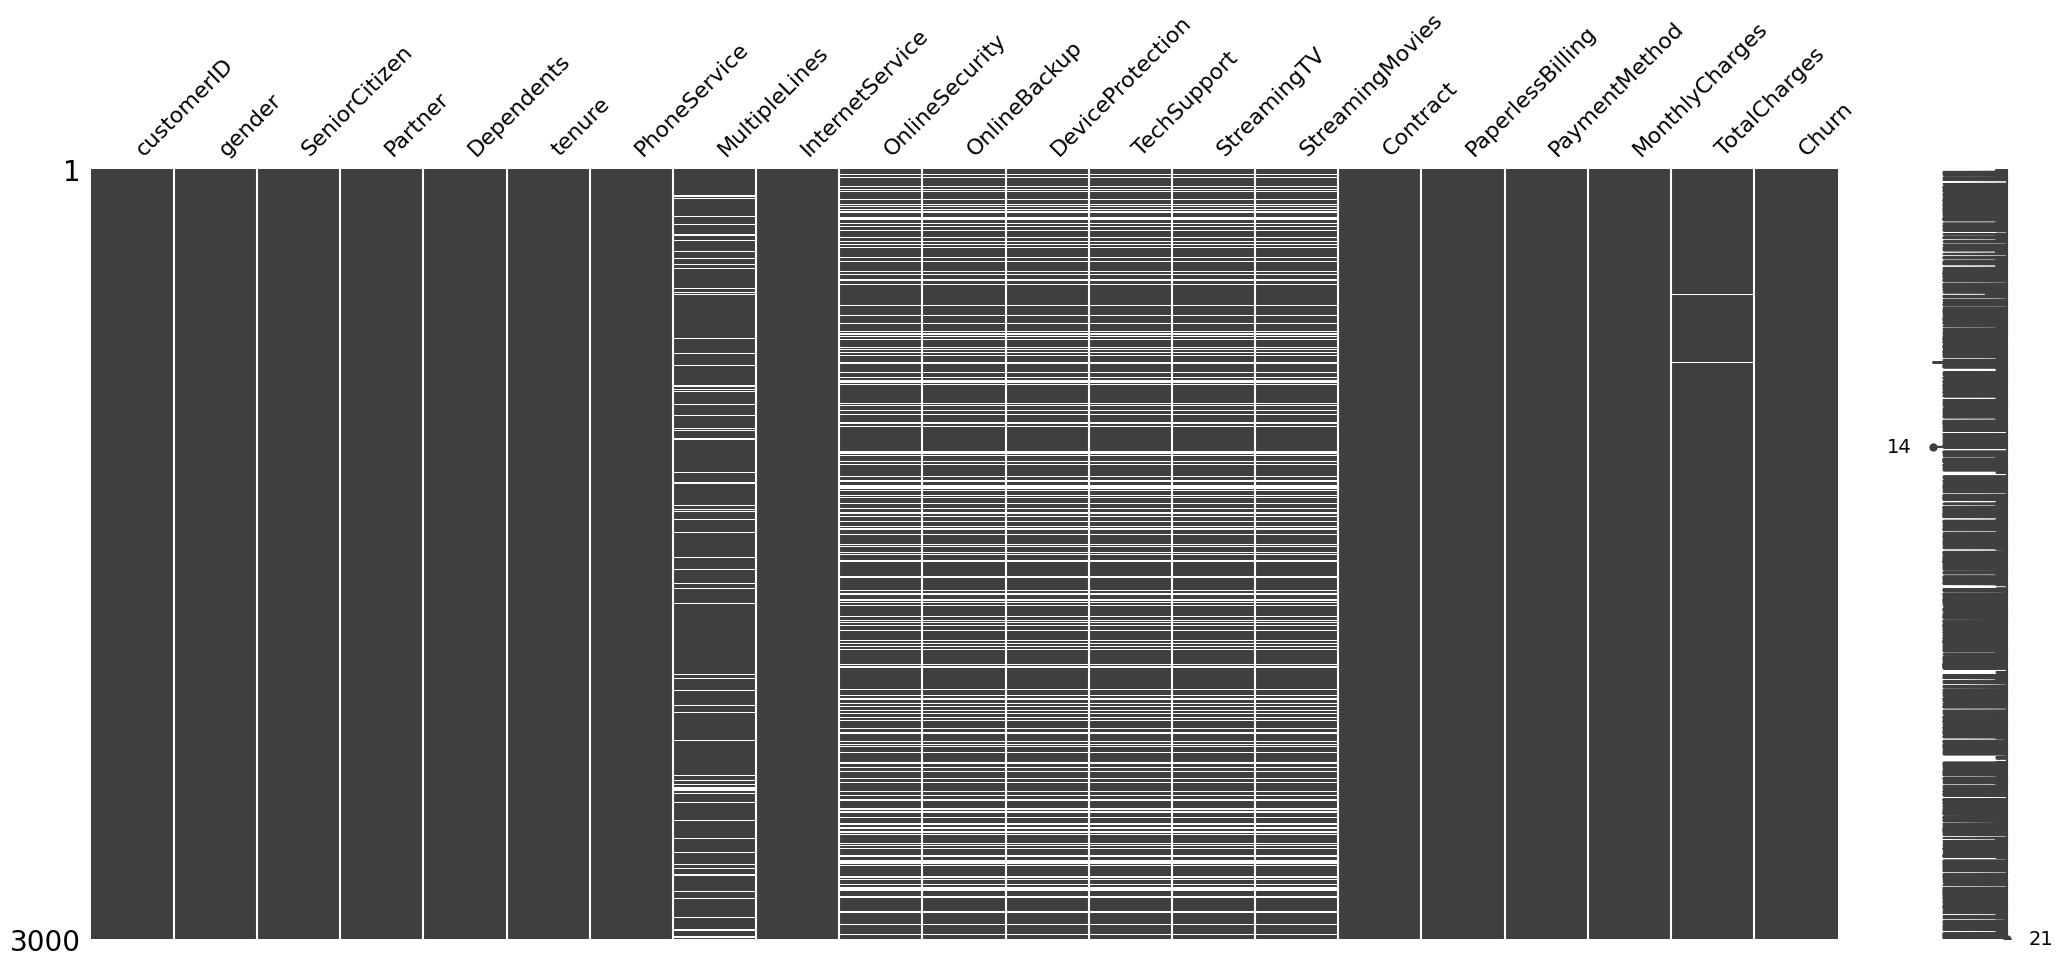

In [12]:
# Check for missing values in the first 3000 data points
check_missing_values(df_first)

Missing values in the DataFrame:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


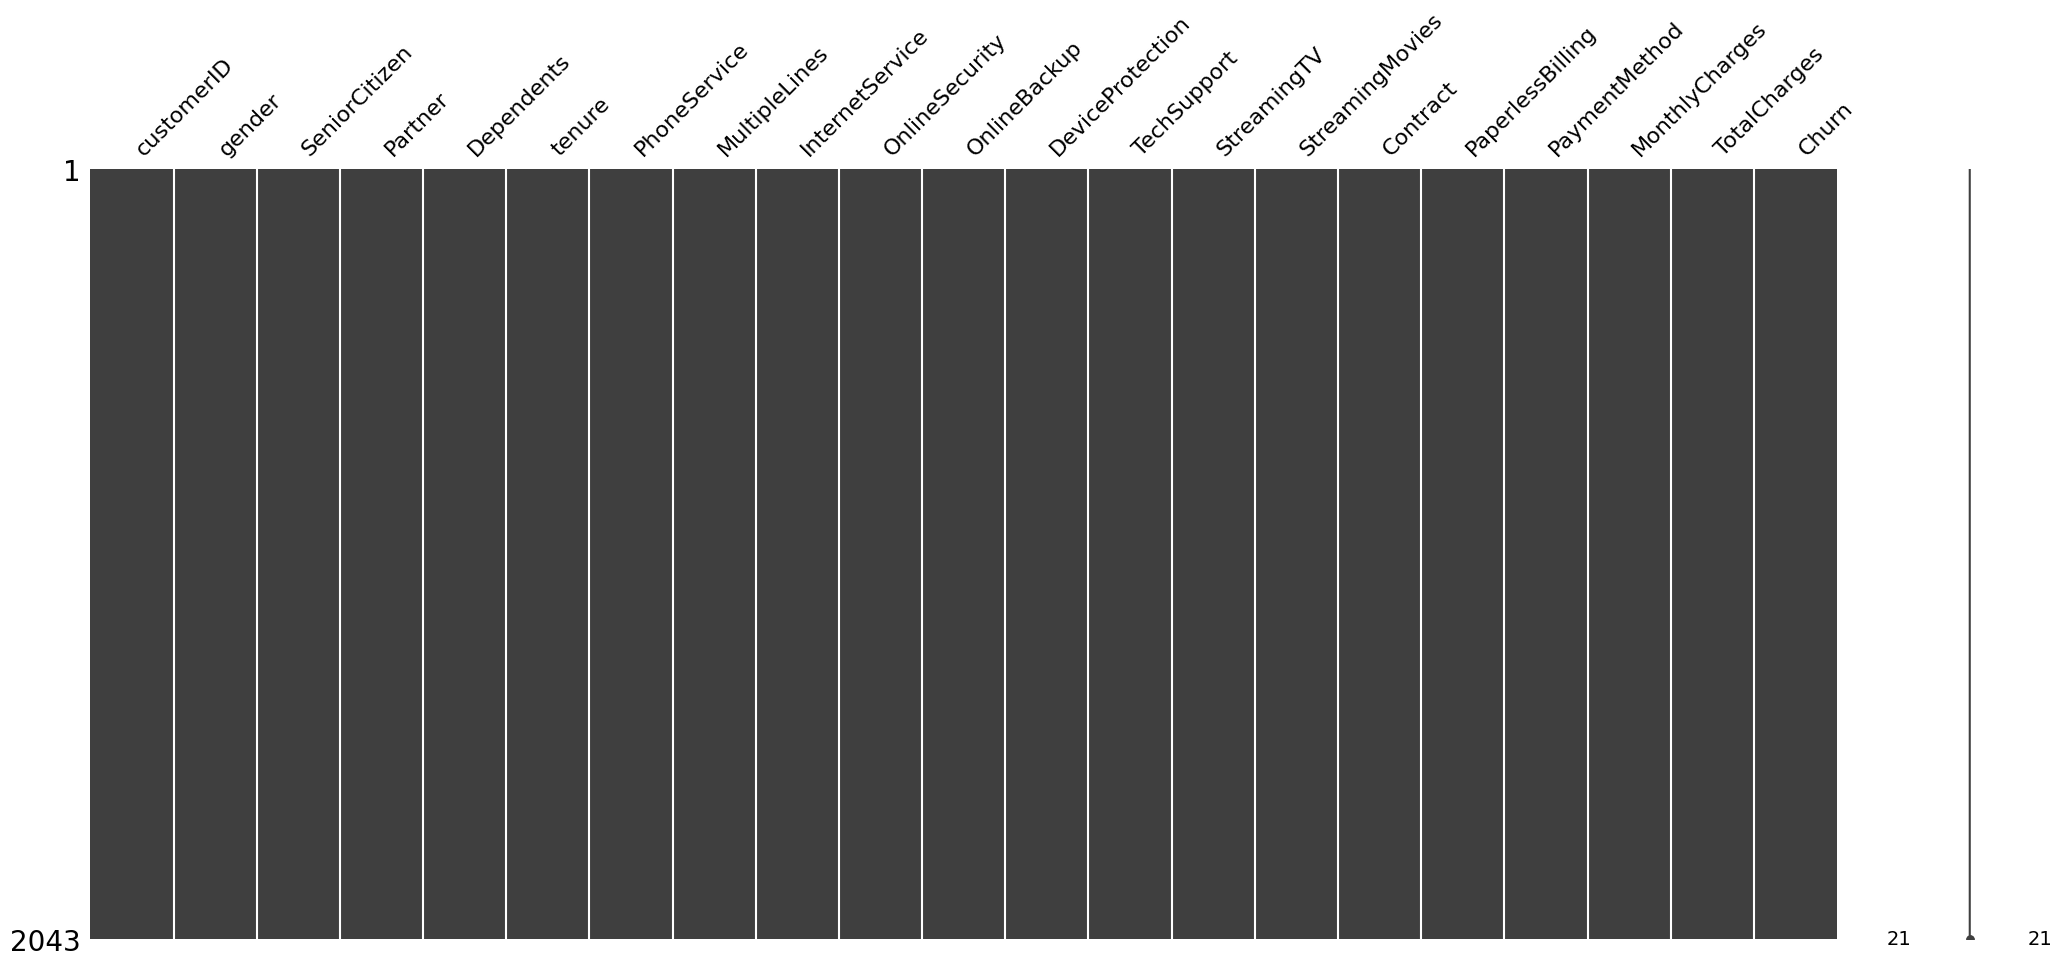

In [13]:
# Check for missing values in the second 2000 data points
check_missing_values(df_second)

Missing values in the DataFrame:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


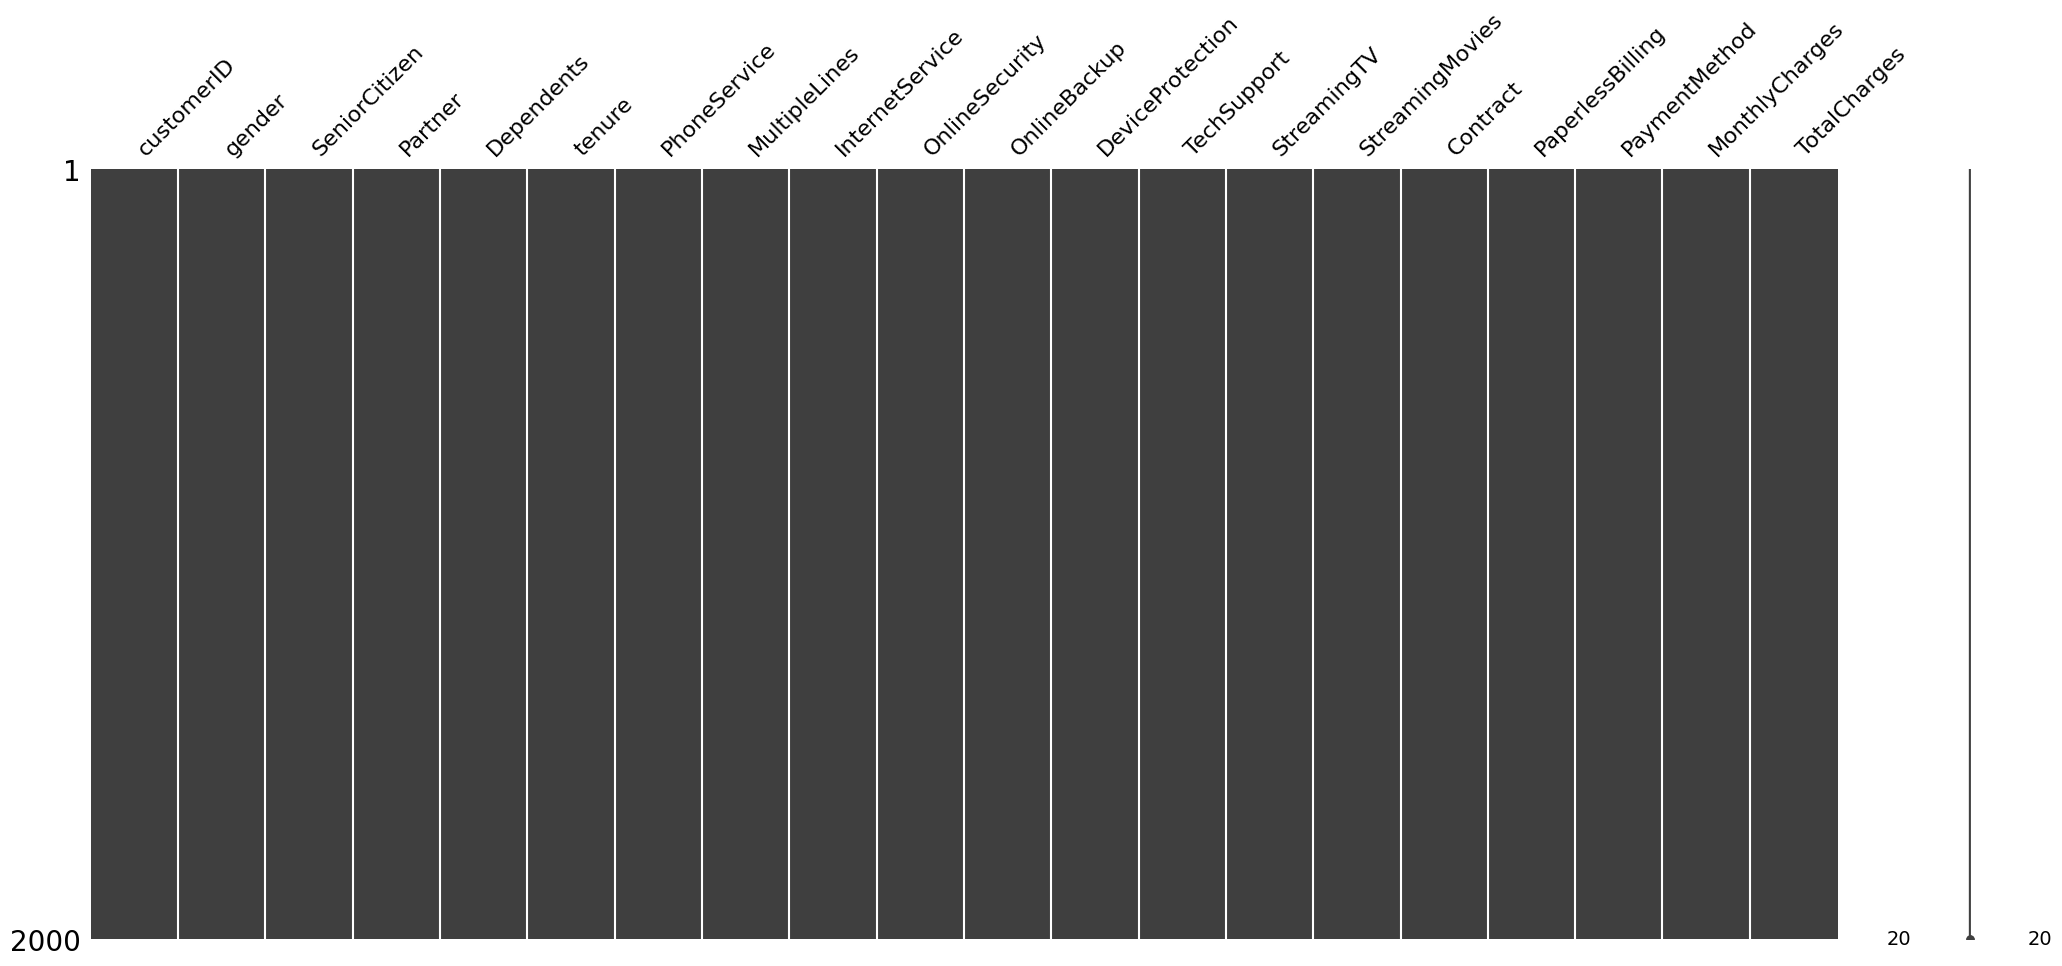

In [14]:
# Check for missing values in the second 2000 data points
check_missing_values(df_last)

### **Defining A Dictionary For Mapping Values**

In [15]:
# Define a dictionary for mapping boolean and None values to more meaningful categories
new_cat_values_mapping = {
    'MultipleLines': {True: 'Yes', False: 'No', None: 'No phone service'},
    'OnlineSecurity': {True: 'Yes', False: 'No', None: 'No internet service'},
    'OnlineBackup': {True: 'Yes', False: 'No', None: 'No internet service'},
    'DeviceProtection': {True: 'Yes', False: 'No', None: 'No internet service'},
    'TechSupport': {True: 'Yes', False: 'No', None: 'No internet service'},
    'StreamingTV': {True: 'Yes', False: 'No', None: 'No internet service'},
    'StreamingMovies': {True: 'Yes', False: 'No', None: 'No internet service'},
    'Churn': {True: 'Yes', False: 'No', None: 'No'},
    'Partner': {True: 'Yes', False: 'No'},
    'Dependents': {True: 'Yes', False: 'No'},
    'PaperlessBilling': {True: 'Yes', False: 'No'},
    'PhoneService': {True: 'Yes', False: 'No'},
    'SeniorCitizen': {True: 1, False: 0}  # Convert True to 1 and False to 0
}

# Use the replace method to map the categorical values in the DataFrame
df_first.replace(new_cat_values_mapping, inplace=True)

In [16]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   int64  
 3   Partner           3000 non-null   object 
 4   Dependents        3000 non-null   object 
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   object 
 7   MultipleLines     3000 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    3000 non-null   object 
 10  OnlineBackup      3000 non-null   object 
 11  DeviceProtection  3000 non-null   object 
 12  TechSupport       3000 non-null   object 
 13  StreamingTV       3000 non-null   object 
 14  StreamingMovies   3000 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   object 


In [17]:
df_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [18]:
# Convert 'TotalCharges' to float and handle non-convertible values with NaN
df_second['TotalCharges'] = pd.to_numeric(df_second['TotalCharges'], errors='coerce')

df_last['TotalCharges'] = pd.to_numeric(df_last['TotalCharges'], errors='coerce')

#### **Merging The Dataset:**

In [19]:
# Concatenate the rows from df_first with all rows from df_second to create the training dataset.
train = pd.concat([df_first, df_second])

# Create the test dataset for df_last.
test = df_last

### **Exploratory Data Analysis**

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [21]:
# Get more information about the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


Missing values in the DataFrame:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64


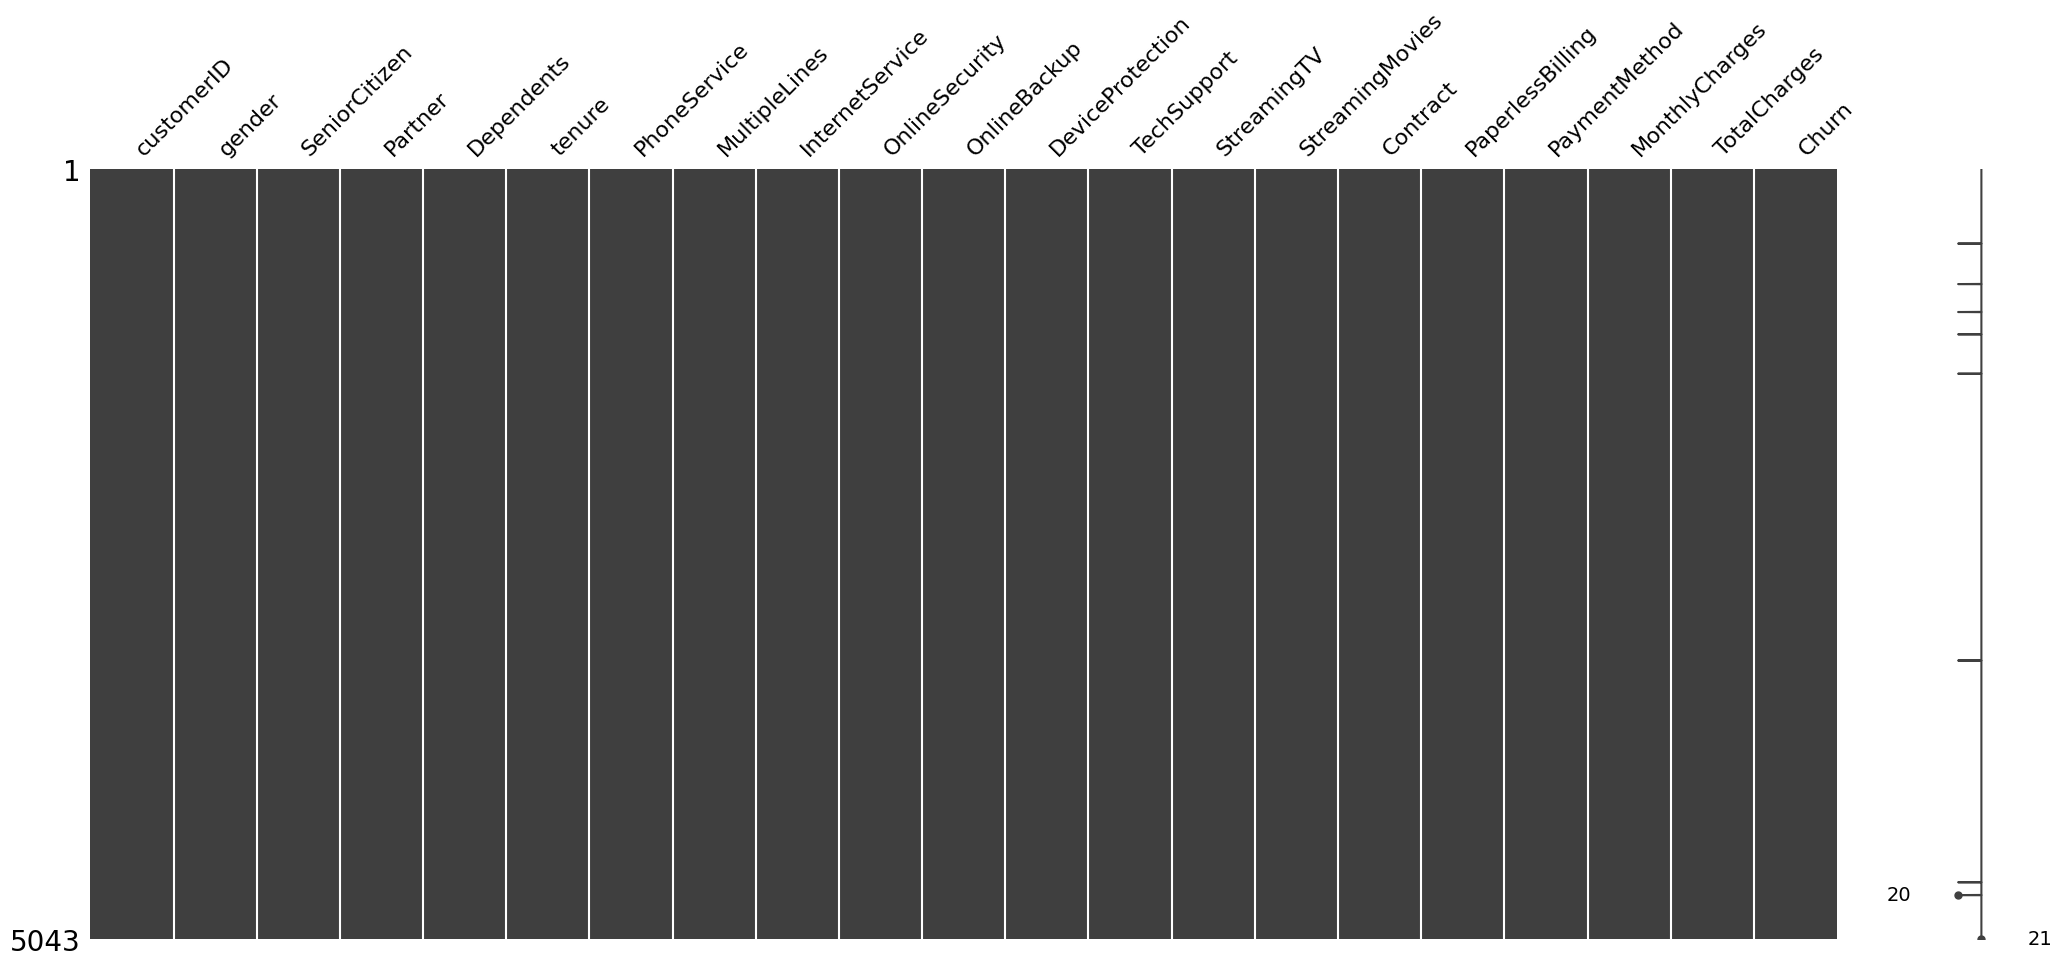

In [22]:
# Visualize the missing values in the train dataset
check_missing_values(train)

In [23]:
# Generate descriptive statistics of the train dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


In [24]:
train.describe(include = 'object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,5043,3,No,2424
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,5043,3,No,2507
OnlineBackup,5043,3,No,2231
DeviceProtection,5043,3,No,2219


In [25]:
columns = train.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
for column in columns:
    print(f'{column}')
    unique_values = train[column].unique()
    print(f'There are {unique_values.size} unique values')
    print(f'{unique_values}')
    print('=' * 50)


customerID
There are 5043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
There are 2 unique values
['Female' 'Male']
SeniorCitizen
There are 2 unique values
[0 1]
Partner
There are 2 unique values
['Yes' 'No']
Dependents
There are 2 unique values
['No' 'Yes']
tenure
There are 73 unique values
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
There are 2 unique values
['No' 'Yes']
MultipleLines
There are 3 unique values
['No phone service' 'No' 'Yes']
InternetService
There are 3 unique values
['DSL' 'Fiber optic' 'No']
OnlineSecurity
There are 3 unique values
['No' 'Yes' 'No internet service']
OnlineBackup
There are 3 unique values
['Yes' 'No' 'No internet service']
DeviceProtection
There are 3 unique values
['No' 'Yes' 'No internet service']
Te

In [27]:
# Identify duplicate indices
duplicate_indices = train.index[train.index.duplicated()]

# Print the duplicate indices
print("Duplicate indices:")
print(duplicate_indices)

# Reset the index to ensure unique indices
train = train.reset_index(drop=True)

# Check if the issue is resolved
print("Index after reset:")
print(train.index[train.index.duplicated()])


Duplicate indices:
Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042],
      dtype='int64', length=2043)
Index after reset:
Index([], dtype='int64')


#### **Univariate Analysis**

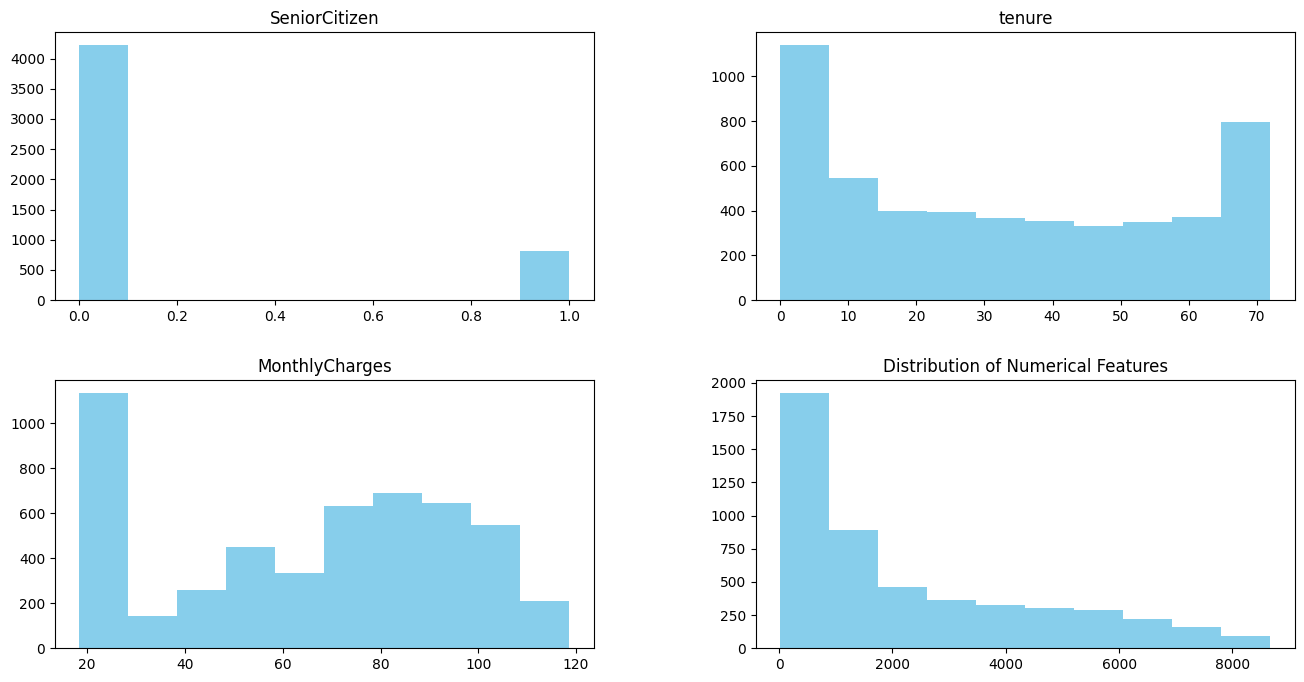

In [28]:
train.hist(figsize=(16,8), grid =False, color='skyblue')
plt.title('Distribution of Numerical Features')
plt.show()

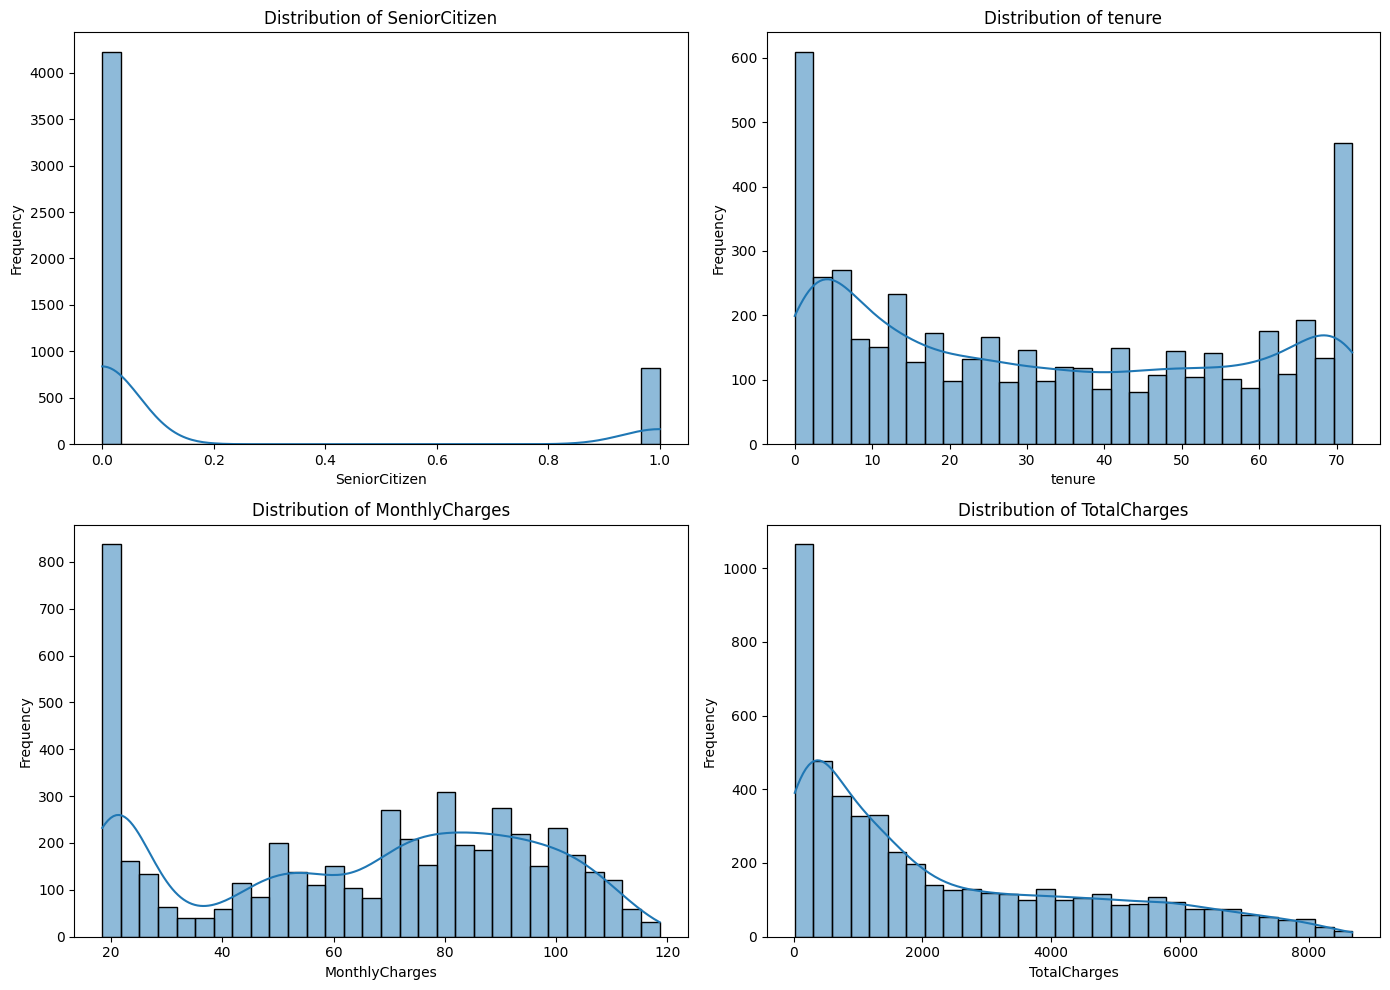

In [29]:
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.histplot(train[col].dropna(), kde=True, ax=axes[idx], bins=30)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#### **Bivariate Analysis**

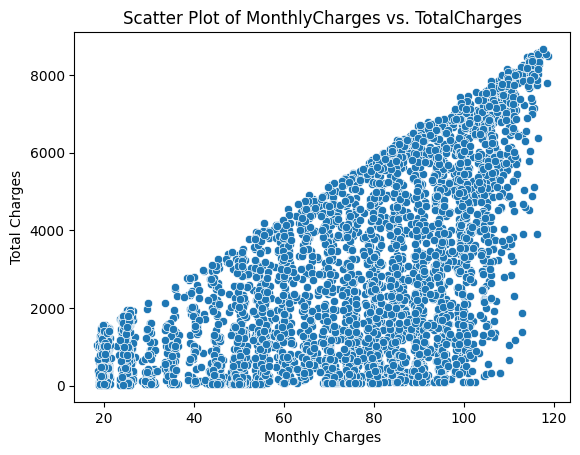

In [30]:
# Scatter plot between two numerical variables, e.g., 'MonthlyCharges' and 'TotalCharges'
sns.scatterplot(data=train, x='MonthlyCharges', y='TotalCharges')
plt.title('Scatter Plot of MonthlyCharges vs. TotalCharges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


This plot shows the relationship between MonthlyCharges and TotalCharges. Since the points form an upward trend, it indicates that as MonthlyCharges increase, TotalCharges also tend to increase.



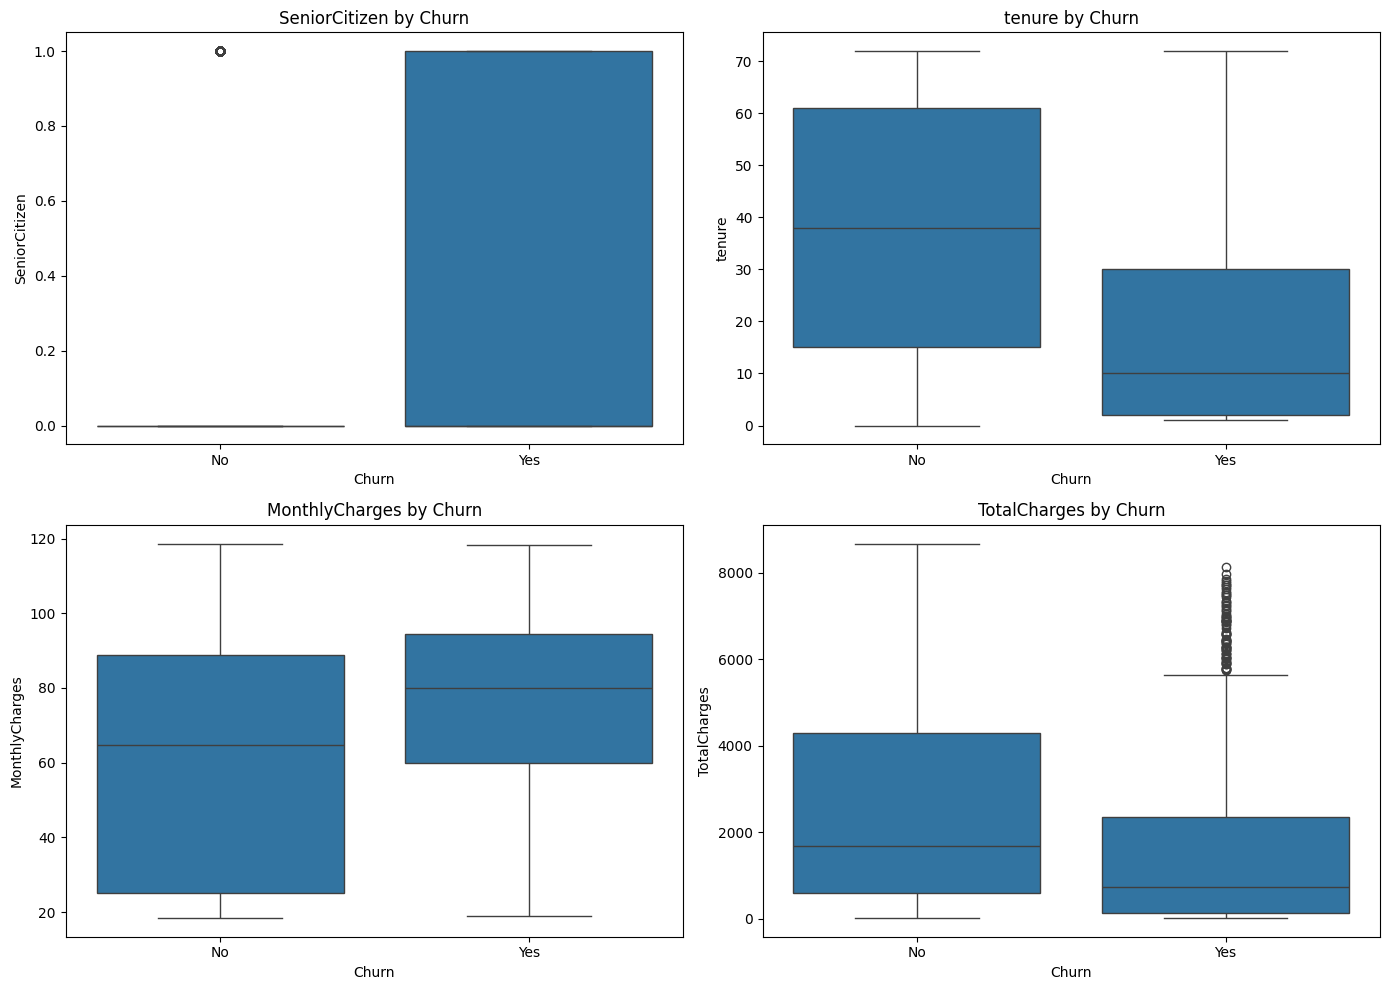

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.boxplot(data=train, x='Churn', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} by Churn')
    axes[idx].set_xlabel('Churn')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()


Box Plots by Churn: These plots show the distribution of numerical variables ('MonthlyCharges', 'TotalCharges', 'tenure') for customers who churned and those who did not. Differences in the medians and the spread of the data can provide insights into how these variables are related to churn.

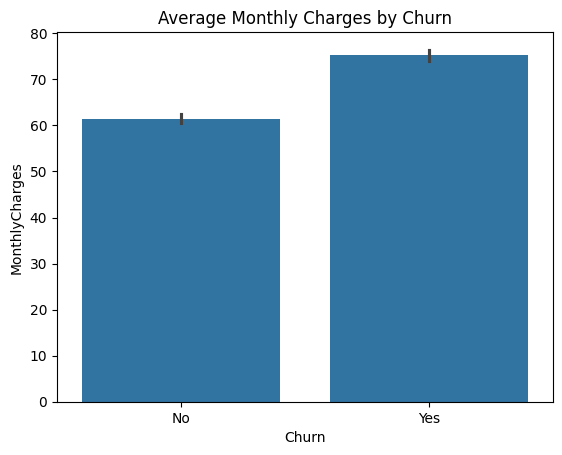

In [32]:
# Bar plot for categorical vs numerical variable
sns.barplot(data=train, x='Churn', y='MonthlyCharges')
plt.title('Average Monthly Charges by Churn')
plt.show()


This plot shows the average MonthlyCharges for customers who churned vs. those who did not. The graph shows that customers who churned tend to have higher MonthlyCharges.

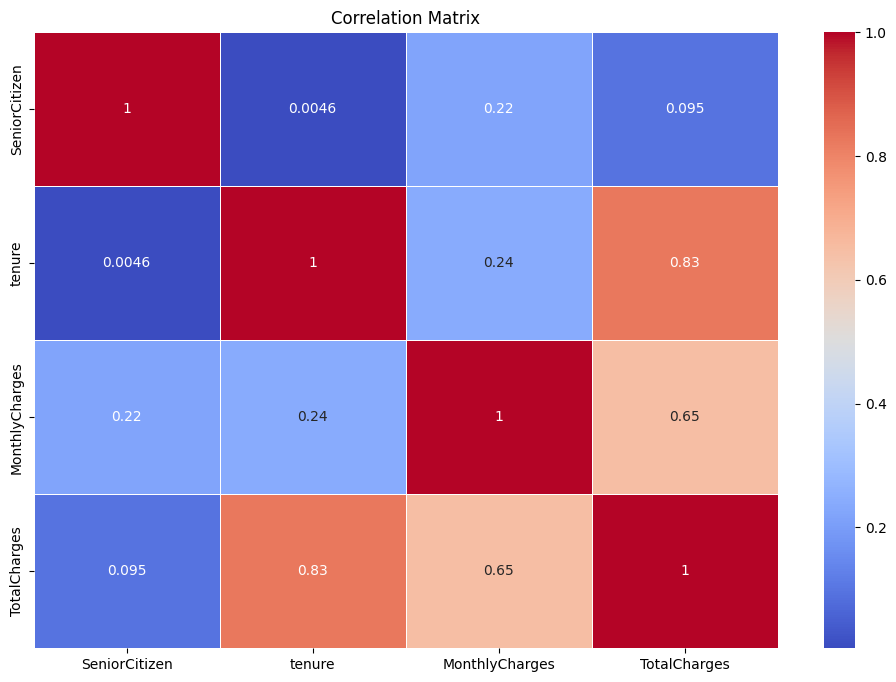

In [33]:
numeric_df = train.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

A correlation matrix shows the correlation coefficients between multiple numerical variables. The values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

Interpretation: Look for high positive or negative values to understand which variables are strongly related.

#### **Multivariate Analysis**

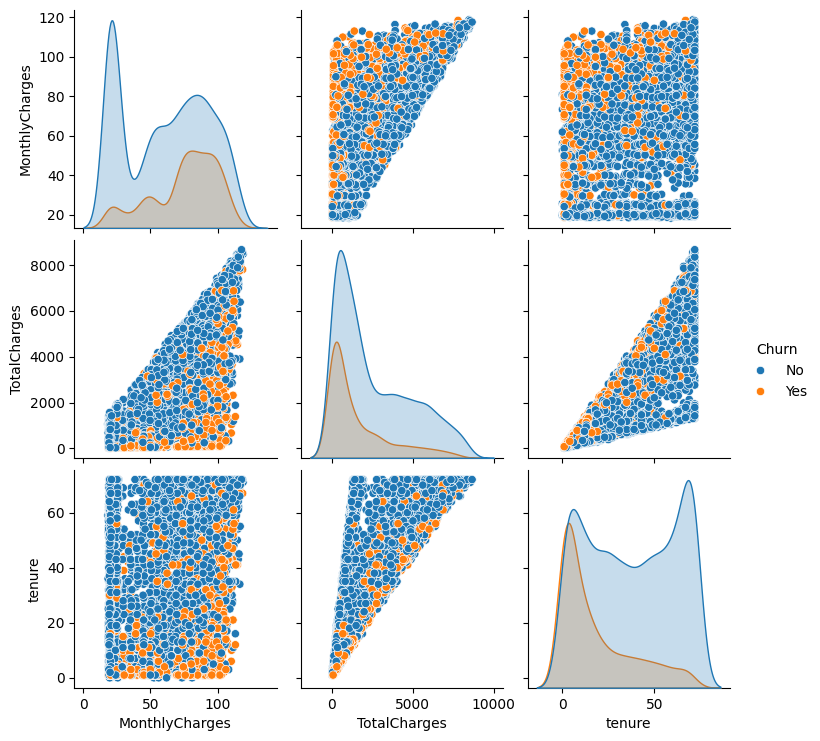

In [34]:
sns.pairplot(train[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']], hue='Churn')
plt.show()


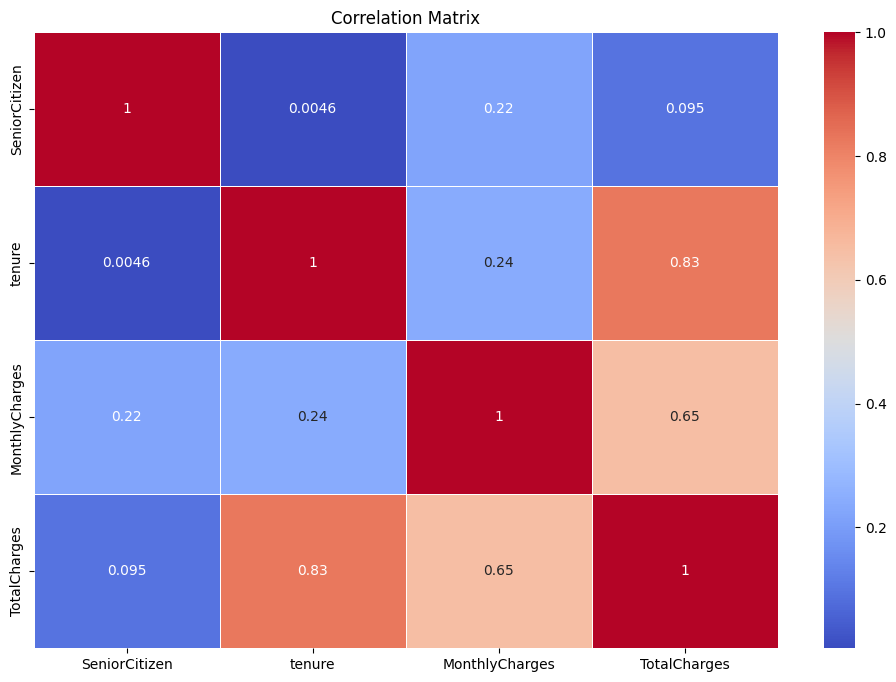

In [35]:
# Ensure all numerical columns are present and correct
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Calculate the correlation matrix
corr_matrix = train[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


This plot helps to see the pairwise relationships and how they differ based on the Churn status. For example, you can observe how tenure and MonthlyCharges relate to each other and to Churn.

In [36]:
import statsmodels.api as sm

# Simple Linear Regression
X = df_final[['MonthlyCharges']]
y = df_final['TotalCharges']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())


ModuleNotFoundError: No module named 'statsmodels'

The heatmap shows the correlation coefficients. For example, if MonthlyCharges and TotalCharges have a high correlation coefficient (close to 1), it means they increase together.

#### Key Insights


1. For the columns where values are represented differently (0 and False, No and True, etc.), I will standardize them to a consistent format across both datasets
2. I will convert all boolean columns to 0 and 1 since numeric representation is often more suitable for machine learning models.
3. The coumns became duplicated with x ones and y ones but the x ones had more missing values so I have to drop the x onnes rather and keep the y ones
4. The categorical conversion to integers was formally in float.
5. Using the KNN Imputer I had to fill all the numerical values and leave the object ones such as Gender, Customer id, Internetservice,contract.
6. There are no duplicated values in the combined dataset
7. Dataset is not evenly distributed